In [25]:
from tools import cs_omp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tools
from sklearn.metrics import mean_squared_error

In [2]:
img=Image.open('test.jpg')
img_arr=np.array(img)

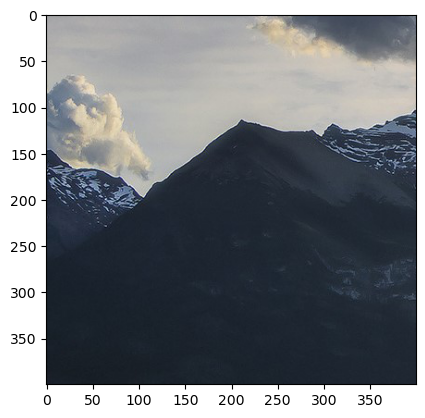

In [3]:
plt.imshow(img_arr)
plt.show()

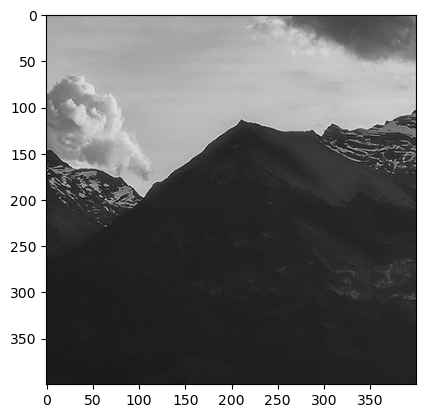

In [8]:
img_gray=np.dot(img_arr,[0.2989, 0.5870, 0.1140])
plt.imshow(img_gray,cmap='gray')
plt.show()

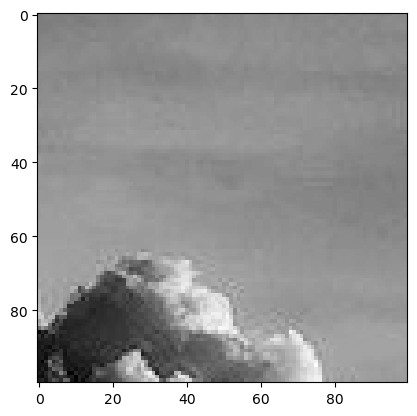

In [19]:
img_gray_part=img_gray[:100,:100]
plt.imshow(img_gray_part,cmap='gray')
plt.show()

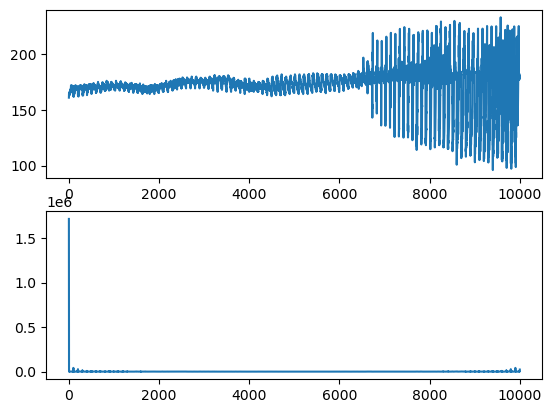

In [20]:
img_line=img_gray_part.reshape(100*100)
plt.figure()
plt.subplot(2,1,1)
plt.plot(img_line)
res_fft_line=np.fft.fft(img_line)
plt.subplot(2,1,2)
plt.plot(np.abs(res_fft_line))
plt.show()

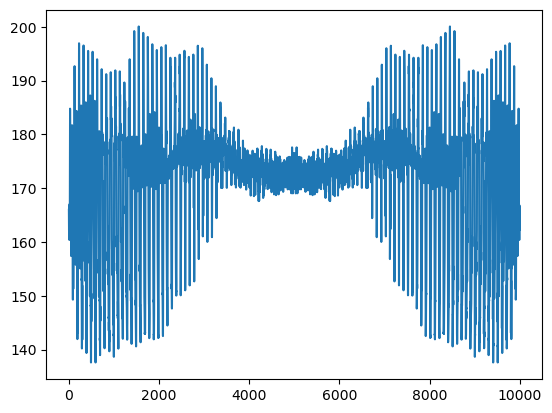

In [28]:
t=np.linspace(0,len(img_line),num=len(img_line))
freq=np.arange(len(img_line)*2)
dictionary=tools.generate_cos_dictionary(t, frequencies=freq)
recovered_weight, support, time = cs_omp(dictionary, img_line, None, 1, 200)
recovered_signal=dictionary @ recovered_weight
plt.plot(recovered_signal)
plt.show()

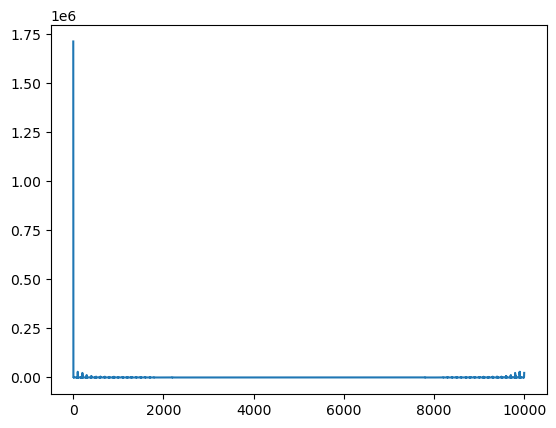

680659.6087346418


In [29]:
recovered_signal_fft=np.fft.fft(recovered_signal)
plt.plot(np.abs(recovered_signal_fft))
plt.show()
print(mean_squared_error(np.abs(recovered_signal_fft),np.abs(res_fft_line)))

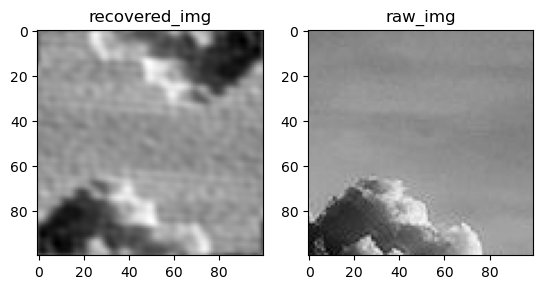

In [32]:
recovered_img=recovered_signal.reshape(100,100)
plt.subplot(1,2,1)
plt.imshow(recovered_img,cmap='gray')
plt.title('recovered_img')
plt.subplot(1,2,2)
plt.imshow(img_gray_part,cmap='gray')
plt.title('raw_img')
plt.show()